In [3]:
import cx_Oracle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

## 교육/문화용품

In [14]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''select 소분류명, round((sum(구매금액)/count(구매금액)),2) 평균금액 from lcl2 where 분류 = '교육/문화용품' group by 소분류명 order by 평균금액 desc'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['소분류명', '평균금액']
df_edu = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
display(df_edu.head())

,소분류명,평균금액
0,피아노/악기,881778.88
1,악기,827583.33
2,피아노,172965.29
3,필기류,165867.50
4,온라인교육보조재,73058.82


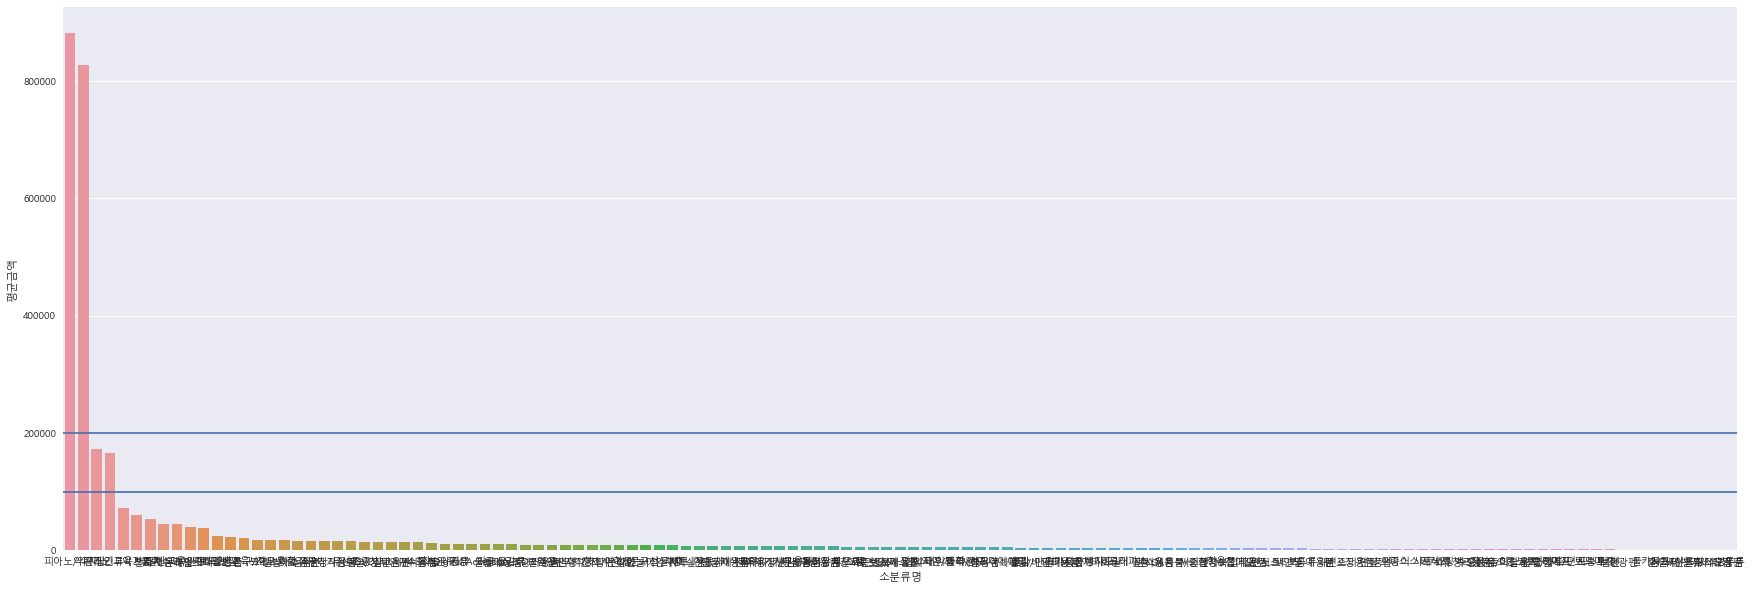

In [15]:
plt.figure(figsize=(30,10))
plt.axhline(y = 200000)
plt.axhline(y = 100000)
sns.barplot(data=df_edu,x='소분류명',y='평균금액');

In [10]:
df.loc[(450>df['평균금액'])&(df['평균금액']>40)]

,소분류명,평균금액


## 외식

In [17]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''select 소분류명, round((sum(구매금액)/count(구매금액)),2) 평균금액 from lcl2 where 분류 = '외식' group by 소분류명 order by 평균금액 desc'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['소분류명', '평균금액']
df_res = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
display(df_res.head())

,소분류명,평균금액
0,가공선물세트,397268.03
1,레토르,250935.94
2,한과(세트행사),137170.14
3,PECK Enoteca,98458.44
4,PECK Fruits,78511.52


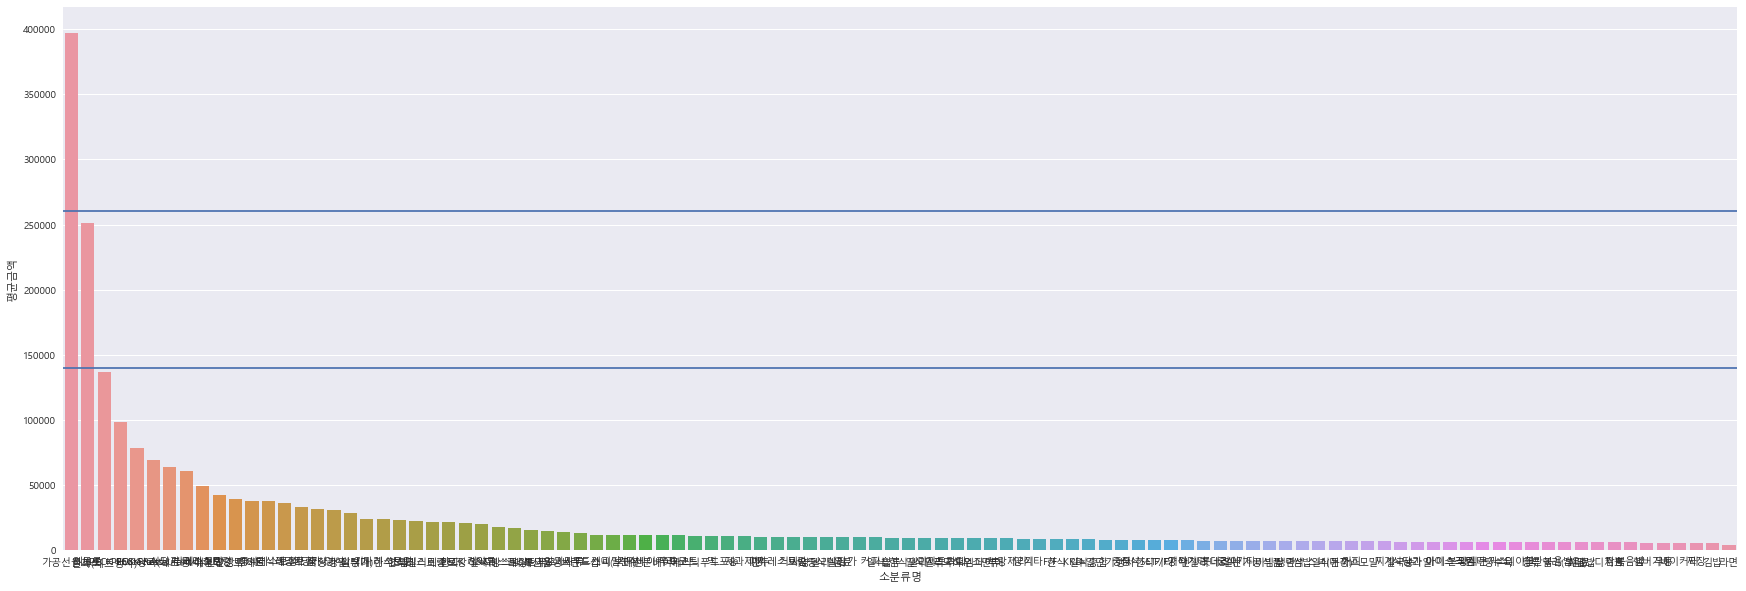

In [19]:
plt.figure(figsize=(30,10))
plt.axhline(y = 260000)
plt.axhline(y = 140000)
sns.barplot(data=df_res,x='소분류명',y='평균금액');

## 디지털/가전

In [20]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''select 소분류명, round((sum(구매금액)/count(구매금액)),2) 평균금액 from lcl2 where 분류 = '디지털/가전' group by 소분류명 order by 평균금액 desc'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['소분류명', '평균금액']
df_digital = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
display(df_digital.head())

,소분류명,평균금액
0,국산A/V,2397569.69
1,에어컨,1903845.08
2,국산냉장고.세탁기,1824764.06
3,스탠드형김치냉장고,1808000.00
4,김치냉장고,1698267.96


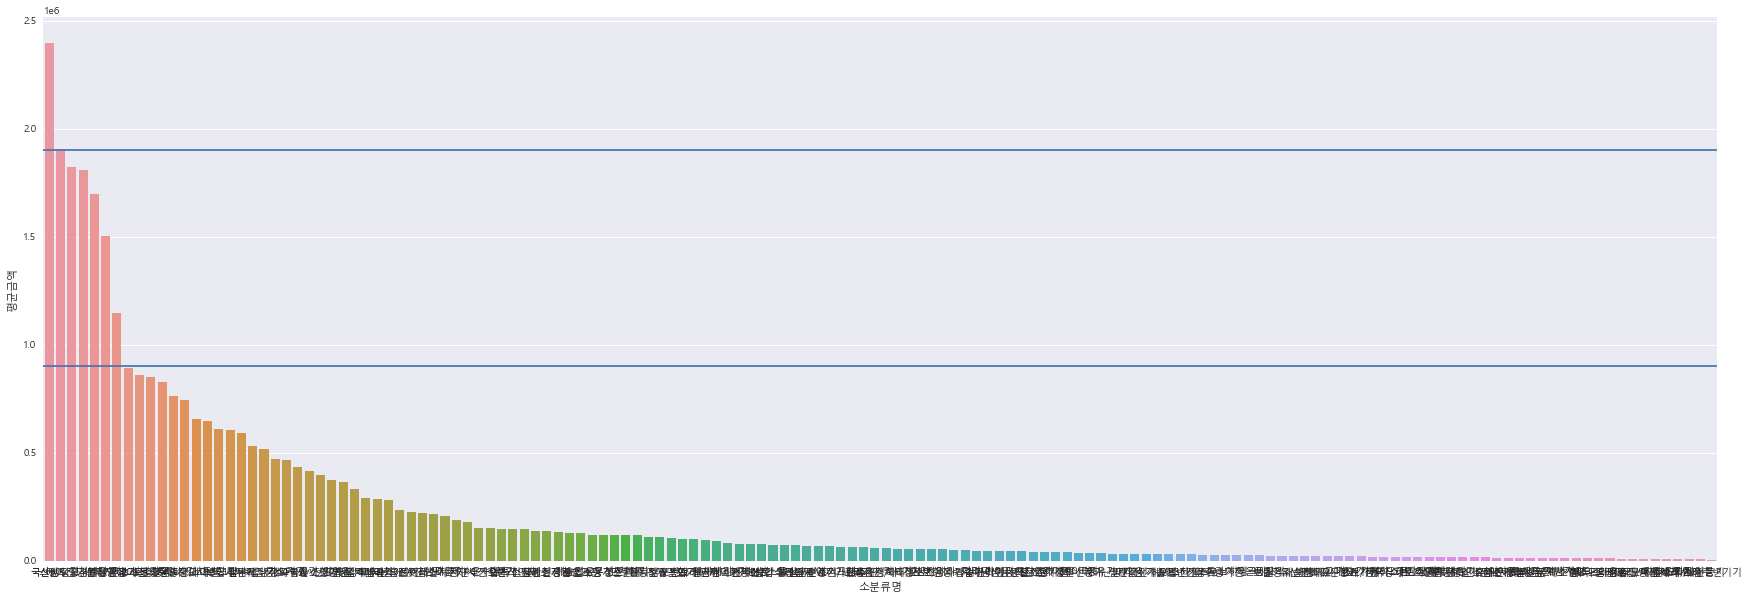

In [34]:
plt.figure(figsize=(30,10))
plt.axhline(y = 1900000)
plt.axhline(y = 900000)
sns.barplot(data=df_digital,x='소분류명',y='평균금액');

## 가공식품

In [24]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''select 소분류명, round((sum(구매금액)/count(구매금액)),2) 평균금액 from lcl2 where 분류 = '가공식품' group by 소분류명 order by 평균금액 desc'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['소분류명', '평균금액']
df_food1 = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
display(df_food1.head())

,소분류명,평균금액
0,선어세트,743000.23
1,굴비세트,469448.87
2,혼합선물세트,385958.47
3,기타건생선세트,339753.42
4,통조림선물세트,314982.93


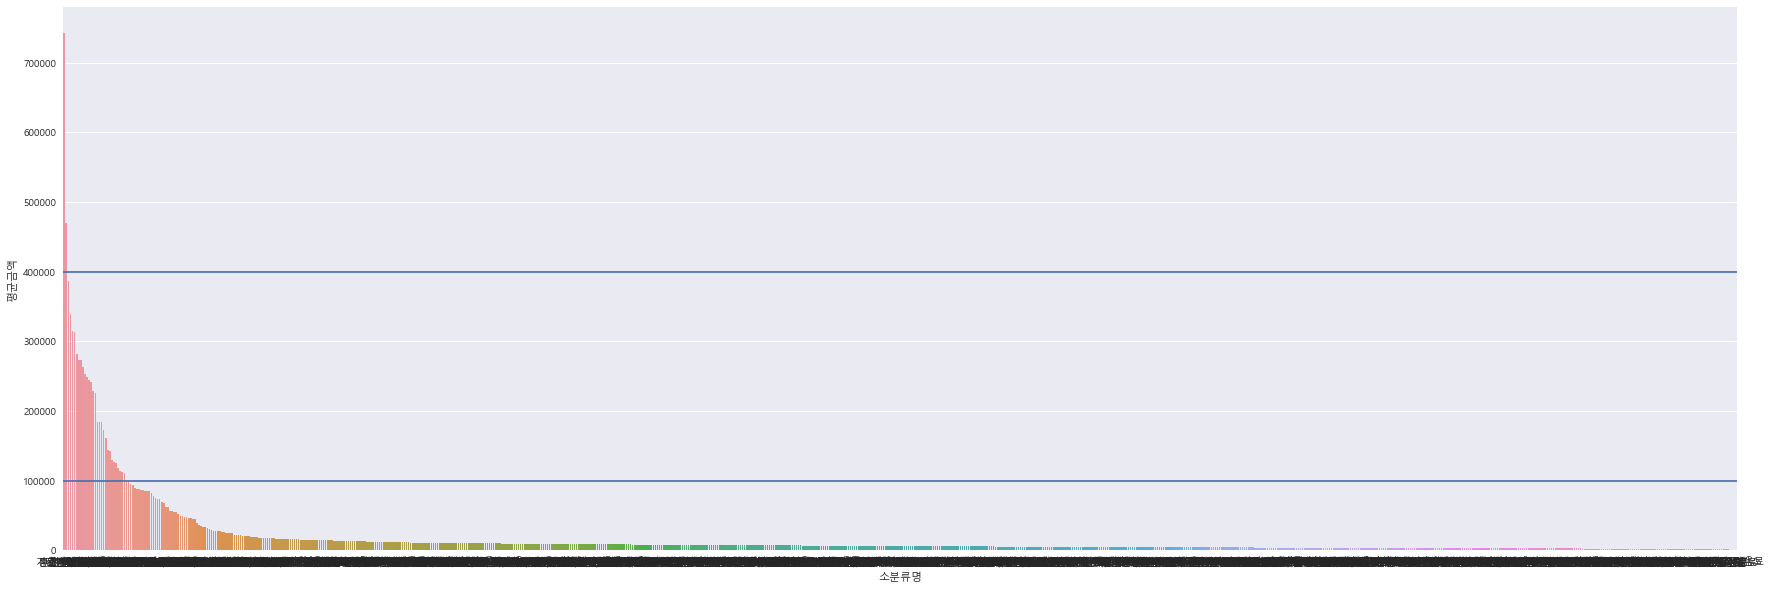

In [28]:
plt.figure(figsize=(30,10))
plt.axhline(y = 400000)
plt.axhline(y = 100000)
sns.barplot(data=df_food1,x='소분류명',y='평균금액');

##  신선식품

In [29]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''select 소분류명, round((sum(구매금액)/count(구매금액)),2) 평균금액 from lcl2 where 분류 = '신선식품' group by 소분류명 order by 평균금액 desc'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['소분류명', '평균금액']
df_food2 = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
display(df_food2.head())

,소분류명,평균금액
0,정육세트,978077.42
1,갈비세트,888752.96
2,수삼/더덕세트,551700.56
3,청과세트,518232.95
4,친환경세트,472582.94


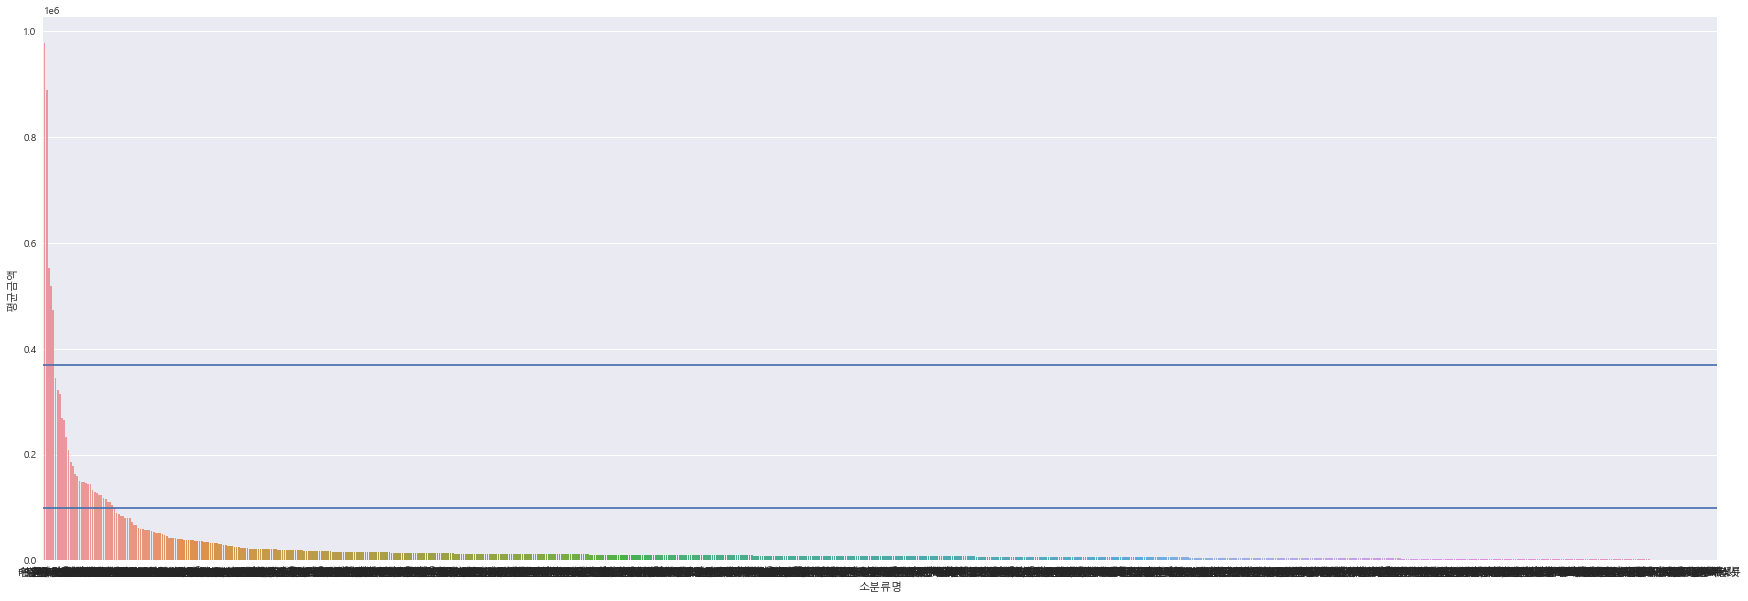

In [32]:
plt.figure(figsize=(30,10))
plt.axhline(y = 370000)
plt.axhline(y = 100000)
sns.barplot(data=df_food2,x='소분류명',y='평균금액');

In [54]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''select 소분류명, sum(구매금액)/count(구매금액) 평균금액 from lcl2 where 분류 = '의류' group by 소분류명 order by 평균금액 desc'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['소분류명', '평균금액']
df_cloth = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
display(df_cloth.head())

,소분류명,평균금액
0,모피,2.603520e+06
1,글로벌골프프라자,1.800000e+06
2,타임옴므,9.582893e+05
3,명성골프,8.828750e+05
4,직수입정장,8.210367e+05


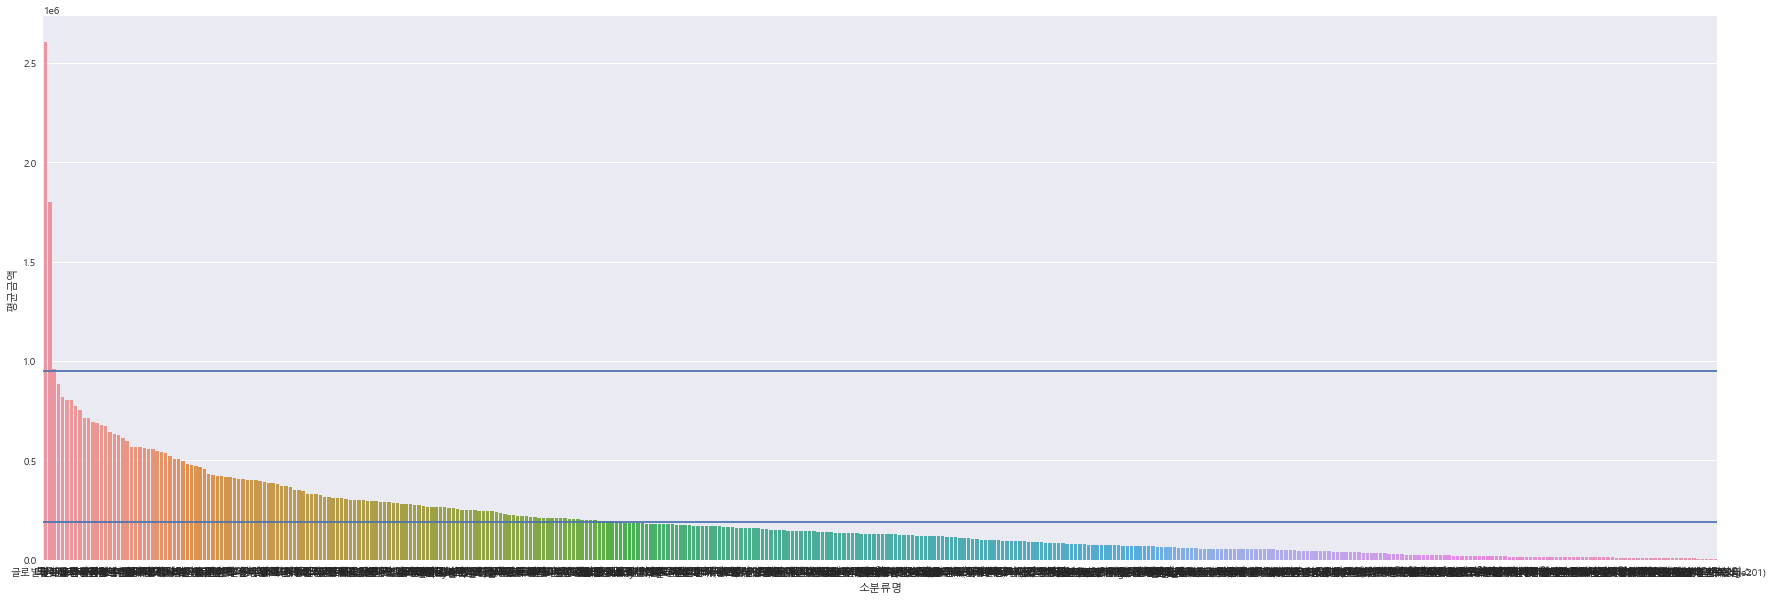

In [9]:
plt.figure(figsize=(30,10))
plt.axhline(y = 950000)
plt.axhline(y = 190000)
sns.barplot(data=df_cloth,x='소분류명',y='평균금액');

In [8]:
df_cloth['평균금액'].describe().astype(int)

count        390
mean      190534
std       233740
min         2166
25%        47203
50%       130104
75%       253220
max      2603520
Name: 평균금액, dtype: int32

In [55]:
df_cloth['평균금액'].sum()

74308581.84145

In [8]:
import pandas as pd
df = pd.read_csv('./dataset/고객속성변수.csv',encoding='cp949',index_col=0)
df

,성별,CAT연령대,지역,경쟁사이용횟수,채널이용횟수,멤버십가입개수,RECENCY6,RECENCY7,고객구분1_7,고객구분1_8,주말구매액비중,주말방문비중
고객번호,,,,,,,,,,,,
1,M,노년층,서울,15,0,0,3,8,감소,감소,0.260030,0.223273
2,M,노년층,경기,8,0,0,6,1,증가,감소,0.346116,0.292115
3,M,노년층,서울,0,0,0,1,8,증가,감소,0.198452,0.195634
4,F,노년층,서울,3,0,0,0,0,증가,증가,0.238813,0.230108
6,F,노년층,강원,0,0,0,0,0,증가,증가,0.167567,0.244821
...,...,...,...,...,...,...,...,...,...,...,...,...
19333,F,청년층,서울,0,5,1,0,2,감소,감소,0.332123,0.328883
19334,M,중년층,충남,30,0,1,7,31,감소,감소,0.286004,0.261711
19335,F,중년층,전북,0,0,1,1,0,증가,증가,0.236982,0.196476


In [5]:
def new_seasonal_scaled(df):
    df1 = df.copy()
    df1.loc[df1['기'] == '1기', '총구매액'] = np.round(df1.loc[df1['기'] == '1기', '총구매액'] / 0.9476399112)
    df1.loc[df1['기'] == '2기', '총구매액'] = np.round(df1.loc[df1['기'] == '2기', '총구매액'] / 0.9785290501)    
    df1.loc[df1['기'] == '3기', '총구매액'] = np.round(df1.loc[df1['기'] == '3기', '총구매액'] / 0.9072731695)    
    df1.loc[df1['기'] == '4기', '총구매액'] = np.round(df1.loc[df1['기'] == '4기', '총구매액'] / 1.166557869)    
    df1.loc[df1['기'] == '5기', '총구매액'] = np.round(df1.loc[df1['기'] == '5기', '총구매액'] / 0.9748289537)    
    df1.loc[df1['기'] == '6기', '총구매액'] = np.round(df1.loc[df1['기'] == '6기', '총구매액'] / 0.9784250528)    
    df1.loc[df1['기'] == '7기', '총구매액'] = np.round(df1.loc[df1['기'] == '7기', '총구매액'] / 0.912781587)    
    df1.loc[df1['기'] == '8기', '총구매액'] = np.round(df1.loc[df1['기'] == '8기', '총구매액'] / 1.133964406)
    df1['총구매액'] = df1['총구매액'].astype('int64')
    return df1

In [6]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, 기,고객구분, sum(구매금액) "총구매액"
FROM LCL2 a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
GROUP BY a.고객번호,기,고객구분
ORDER BY a.고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','기','고객구분','총구매액']
df_all = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
df_all = new_seasonal_scaled(df_all).copy()
display(df_all.head())

,고객번호,기,고객구분,총구매액
0,00001,1기,감소,9646692
1,00001,2기,감소,11020383
2,00001,3기,감소,11883466
3,00001,4기,감소,20003090
4,00001,5기,감소,9543197


In [10]:
df_all = df_all[['고객번호','고객구분','총구매액']].groupby(['고객번호']).sum()
df_all['총구매액']
df['총구매액'] = df_all['총구매액'].tolist()
# df_1 = pd.concat([df,df_all],axis=1)
df


,성별,CAT연령대,지역,경쟁사이용횟수,채널이용횟수,멤버십가입개수,RECENCY6,RECENCY7,고객구분1_7,고객구분1_8,주말구매액비중,주말방문비중,총구매액
고객번호,,,,,,,,,,,,,
1,M,노년층,서울,15,0,0,3,8,감소,감소,0.260030,0.223273,84104545
2,M,노년층,경기,8,0,0,6,1,증가,감소,0.346116,0.292115,101978159
3,M,노년층,서울,0,0,0,1,8,증가,감소,0.198452,0.195634,3227722
4,F,노년층,서울,3,0,0,0,0,증가,증가,0.238813,0.230108,16936799
6,F,노년층,강원,0,0,0,0,0,증가,증가,0.167567,0.244821,24708631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,F,청년층,서울,0,5,1,0,2,감소,감소,0.332123,0.328883,4782267
19334,M,중년층,충남,30,0,1,7,31,감소,감소,0.286004,0.261711,12371721
19335,F,중년층,전북,0,0,1,1,0,증가,증가,0.236982,0.196476,16789403


In [13]:
print((df['고객구분1_8'] == '증가').sum())
print((df['고객구분1_8'] == '감소').sum())

8608
10258


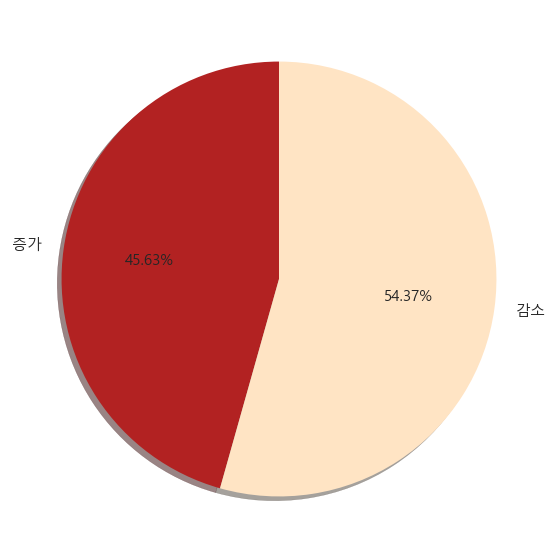

In [17]:
group_names = ['증가','감소']
group_sizes = [(df['고객구분1_8'] == '증가').sum(),(df['고객구분1_8'] == '감소').sum()]
group_colors = ['firebrick','bisque']
group_explodes = [0.0,0.0]
plt.figure(figsize=(10,10))
plt.pie(group_sizes,
        colors = group_colors,
       explode = group_explodes,
       labels = group_names,
       autopct='%1.2f%%',
       shadow=True,
       startangle=90,
       textprops={'fontsize':15});

In [42]:
# 고정고객으로 정의한 고객 정보 불러오기
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기, sum(a.구매금액) "총구매액"
FROM LCL2 a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
GROUP BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기
ORDER BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연령대', '지역', '세분류명', '분류', '고객구분','기', '총구매액']
df_all = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
df_all = new_seasonal_scaled(df_all).copy()
display(df_all.head())

,고객번호,성별,연령대,지역,세분류명,분류,고객구분,기,총구매액
0,00001,M,60세이상,서울,선매품,가구/인테리어,감소,1기,187466
1,00001,M,60세이상,서울,선매품,가구/인테리어,감소,3기,70365
2,00001,M,60세이상,서울,선매품,가구/인테리어,감소,4기,4034433
3,00001,M,60세이상,서울,선매품,가구/인테리어,감소,5기,87708
4,00001,M,60세이상,서울,선매품,가구/인테리어,감소,6기,502593


In [43]:
df_joanna = df_all.loc[(df_all['기']=='1기')|(df_all['기']=='8기')]

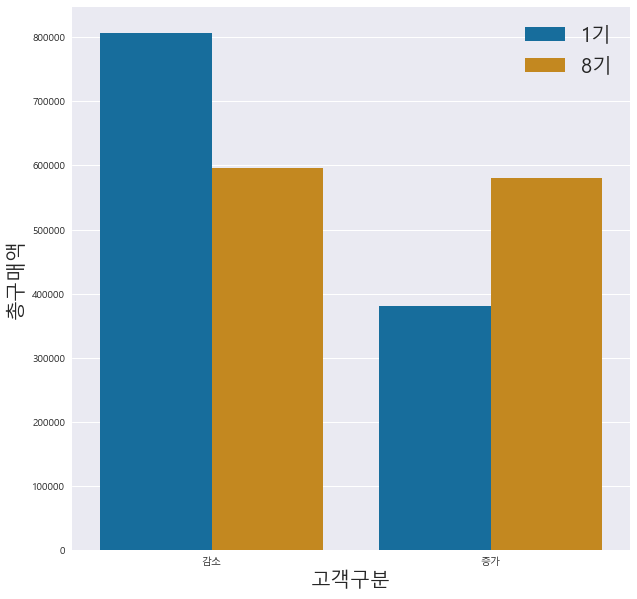

In [62]:
plt.figure(figsize=(10,10))
palette = sns.color_palette("bright")
sns.set_palette("colorblind")
p = sns.barplot(data=df_joanna,x=df_joanna['고객구분'],y='총구매액',hue=df_joanna['기'],ci=None)
plt.legend(fontsize=20)
p.set_xlabel("고객구분", fontsize = 20)
p.set_ylabel("총구매액", fontsize = 20)

plt.show();

In [18]:
# 4분기 동안의 매출액 (2014년 상반기, 하반기, 2015년 상반기, 하반기)

con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 연도,분기,SUM(구매금액) 총매출액 FROM PURPROD GROUP BY 분기,연도 ORDER BY 분기, 연도'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['연도','분기', '총매출액']
df2 = pd.DataFrame(x,columns=columns)
display(df2)
cursor.close()
con.commit()
con.close()

,연도,분기,총매출액
0,2014,1분기,77694762743
1,2015,1분기,84454475955
2,2014,2분기,80545967397
3,2015,2분기,84834674190
4,2014,3분기,74949714657
5,2015,3분기,79536551000
6,2014,4분기,96411395784
7,2015,4분기,98591615215


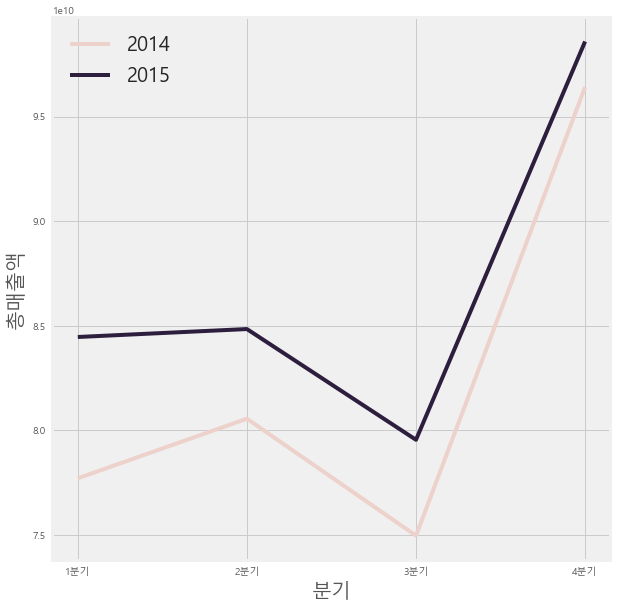

In [27]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리
p = sns.lineplot(data=df2,x=df2['분기'],y=df2['총매출액'],hue=df2['연도']);
plt.legend(fontsize=20)
p.set_xlabel("분기", fontsize = 20)
p.set_ylabel("총매출액", fontsize = 20)
plt.show()